<a href="https://colab.research.google.com/github/jeffheaton/app_generative_ai/blob/main/assignments/assignment_yourname_t81_559_class2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# T81-559: Applications of Generative AI
* Instructor: [Jeff Heaton](https://sites.wustl.edu/jeffheaton/), McKelvey School of Engineering, [Washington University in St. Louis](https://engineering.wustl.edu/index.html)
* For more information visit the [class website](https://sites.wustl.edu/jeffheaton/).

**Module 2 Assignment: Code Generation**

**Student Name: Your Name**

# Assignment Instructions

Develop a prompt that will generate an image similar to this one. Your image does not need to look exactly like this one, but important detals, such as the colors, counts, and positions of items are required.  Make sure to also include the prompt as a Python comment string, such as:

"""Prompt: Please write python code to do this....."""

![Assignment 2](https://s3.amazonaws.com/data.heatonresearch.com/images/wustl/app_genai/assignments/t81_559_assignment_2.jpg)

The submit function accepts a PIL image, so it is suggested you use the PIL image library. The idea here is not for you to learn to write Python image rendering, but to have a prompt do the work for you.

# Google CoLab Instructions

If you are using Google CoLab, it will be necessary to mount your GDrive so that you can send your notebook during the submit process.  Running the following code will map your GDrive to ```/content/drive```.

In [1]:
try:
  from google.colab import drive, userdata
  drive.mount('/content/drive', force_remount=True)
  COLAB = True
  print("Note: using Google CoLab")
except:
  print("Note: not using Google CoLab")
  COLAB = False

# Assignment Submission Key - Was sent you first week of class.
# If you are in both classes, this is the same key.
if COLAB:
  # For Colab, add to your "Secrets" (key icon at the left)
  key = userdata.get('T81_559_KEY')
else:
  # If not colab, enter your key here, or use an environment variable.
  # (this is only an example key, use yours)
  key = "Gx5en9cEVvaZnjhdaushddhuhhO4PsI32sgldAXj"

Note: not using Google CoLab


If you are running this notebook with CoLab, the following command will show you your notebooks. You will need to know the location of your notebook when you submit your assignment.

In [ ]:
!ls /content/drive/My\ Drive/Colab\ Notebooks

 amortization.ipynb				'Copy of t81_559_class_07_2_tools (1).ipynb'
 animate_graph.ipynb				'Copy of t81_559_class_07_2_tools.ipynb'
'assignment_jheaton_class1 (1).ipynb'		'Copy of t81_559_class_07_5_custom_agent.ipynb'
 assignment_jheaton_class1.ipynb		'd (1).nuojia-2.ipynb'
 assignment_jiaxiang_class1.ipynb		 d.nuojia-2.ipynb
'assignment_solution_class10 (1).ipynb'		 d.nuojia-3.ipynb
'assignment_solution_class10 (2).ipynb'		 facial-82.ipynb
 assignment_solution_class10_huh.ipynb		 faqi-2.ipynb
 assignment_solution_class10.ipynb		 fix_t81_559_class_06_4_qa.ipynb
 assignment_solution_class1.ipynb		 fix_t81_559_class_07_5_custom_agent.ipynb
'assignment_solution_class2 (1).ipynb'		 get_api_key.ipynb
 assignment_solution_class2.ipynb		 grade_ice.ipynb
 assignment_solution_class3.ipynb		 jeff_grading.ipynb
'assignment_solution_class4 (1).ipynb'		 jiaxiang.zou-3.ipynb
 assignment_solution_class4.ipynb		 jiaxiang.zou-4.ipynb
'assignment_solution_class5 (1).ipynb'		 jtheaton-1.ipynb
 assignme

# Assignment Submit Function

You will submit the ten programming assignments electronically.  The following **submit** function can be used to do this.  My server will perform a basic check of each assignment and let you know if it sees any underlying problems.

**It is unlikely that should need to modify this function.**

In [ ]:
import base64
import os
import numpy as np
import pandas as pd
import requests
import PIL
import PIL.Image
import io
from typing import List, Union

# This function submits an assignment.  You can submit an assignment as much as you like, only the final
# submission counts.  The paramaters are as follows:
# data - List of pandas dataframes or images.
# key - Your student key that was emailed to you.
# course - The course that you are in, currently t81-558 or t81-559.
# no - The assignment class number, should be 1 through 10.
# source_file - The full path to your Python or IPYNB file.  This must have "_class1" as part of its name.
# .             The number must match your assignment number.  For example "_class2" for class assignment #2.

def submit(
    data: List[Union[pd.DataFrame, PIL.Image.Image]],
    key: str,
    course: str,
    no: int,
    source_file: str = None
) -> None:
    if source_file is None and '__file__' not in globals():
        raise Exception("Must specify a filename when in a Jupyter notebook.")
    if source_file is None:
        source_file = __file__

    suffix = f'_class{no}'
    if suffix not in source_file:
        raise Exception(f"{suffix} must be part of the filename.")

    ext = os.path.splitext(source_file)[-1].lower()
    if ext not in ['.ipynb', '.py']:
        raise Exception(f"Source file is {ext}; must be .py or .ipynb")

    with open(source_file, "rb") as file:
        encoded_python = base64.b64encode(file.read()).decode('ascii')

    payload = []
    for item in data:
        if isinstance(item, PIL.Image.Image):
            buffered = io.BytesIO()
            item.save(buffered, format="PNG")
            payload.append({'PNG': base64.b64encode(buffered.getvalue()).decode('ascii')})
        elif isinstance(item, pd.DataFrame):
            payload.append({'CSV': base64.b64encode(item.to_csv(index=False).encode('ascii')).decode("ascii")})
        else:
            raise ValueError(f"Unsupported data type: {type(item)}")

    response = requests.post(
        "https://api.heatonresearch.com/wu/submit",
        headers={'x-api-key': key},
        json={
            'payload': payload,
            'assignment': no,
            'course': course,
            'ext': ext,
            'py': encoded_python
        }
    )

    if response.status_code == 200:
        print(f"Success: {response.text}")
    else:
        print(f"Failure: {response.text}")

# Assignment #2 Sample Code

For assignment #2 I will give you starting code that renders the wrong sort of image, however, it goes through all the necessary steps. The first step is to develop a prompt, such as:

```
Write a Python program that draws a 600x600 image, with a 8-pointed white star with a black background, the star should be hollow, with a line-width of 7. Use PIL to render it.
```

Then use chatgpt-4o-mini to create the code.

In [2]:
'''Prompt: Write a Python program that draws a 600x600 image, with a 8-pointed
white star with a black background, the star should be hollow, with a line-width
of 7. Use PIL to render it.
'''

from PIL import Image, ImageDraw
import math

# Function to draw an 8-pointed star
def draw_star(draw, center, radius, color, line_width):
    points = []
    for i in range(16):  # 16 points needed for an 8-pointed star
        angle = math.pi / 8 * i  # Calculate the angle
        r = radius if i % 2 == 0 else radius / 2  # Alternate between outer and inner points
        x = center[0] + r * math.cos(angle)
        y = center[1] + r * math.sin(angle)
        points.append((x, y))

    draw.polygon(points, outline=color, width=line_width)

# Create a black background image
image_size = (600, 600)
image = Image.new("RGB", image_size, "black")
draw = ImageDraw.Draw(image)

# Define the star parameters
center = (300, 300)
radius = 200
color = "white"
line_width = 7

# Draw the 8-pointed star
draw_star(draw, center, radius, color, line_width)

Quick code to render what you drew.

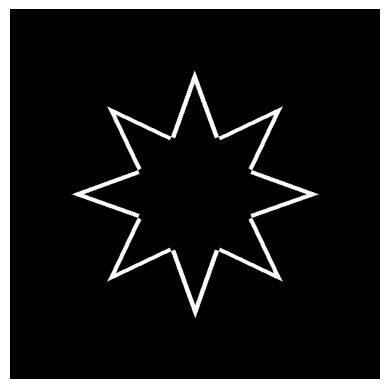

In [3]:
import matplotlib.pyplot as plt

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Hide the axes
plt.show()

In [ ]:
# You must identify your source file.  (modify for your local setup)
file="/content/drive/My Drive/Colab Notebooks/assignment_yourname_t81_559_class2.ipynb"  # Google CoLab
# file='C:\\Users\\jeffh\\projects\\t81_559_deep_learning\\assignments\\assignment_yourname_t81_559_class2.ipynb'  # Windows
# file='/Users/jheaton/projects/t81_559_deep_learning/assignments/assignment_yourname_t81_559_class2.ipynb'  # Mac/Linux

submit(source_file=file,data=[image],key=key,no=2, course='t81-559')

Success: Submitted Assignment 2 (t81-559) for jtheaton:
You have submitted this assignment 7 times. (this is fine)
Based on the provided image and code, here's the evaluation of whether the program/image achieved each of the requested items:
Item 1: Yes. The image dimensions are set to 640x480 as requested.
Item 2: Yes. The code creates 50 horizontal bars that cycle between yellow, purple, and green colors.
Item 3: Yes. A white circle is drawn in the center with a diameter of 100 pixels (radius of 50).
Item 4: Yes. The code specifically redraws the yellow bars after drawing the white circle, ensuring that only the yellow bars appear in front of the circle while the other colors stop for it.
Item 5: Yes. The code includes a comment with a "Prompt:" that describes the task for generating this image, which could be used as an LLM prompt to create similar code.
You addressed all items (5/5).
No warnings or errors (only notes), you will probably do well, but no guarantee. :-)


In [10]:
#!pip install langchain_openai
import os
os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

In [11]:
from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferWindowMemory
from langchain_openai import ChatOpenAI
from langchain_core.prompts.chat import PromptTemplate
from IPython.display import display_markdown

MODEL = 'gpt-4o-mini'
TEMPLATE = """The following is a friendly conversation between a human and an
AI to generate Python code. If you have notes about the code, place them before
the code. Any nots about execution should follow the code. If you do mix any
notes with the code, make them comments. Add proper comments to the code.
Sort imports and follow PEP-8 formatting.

Current conversation:
{history}
Human: {input}
Code Assistant:"""
PROMPT_TEMPLATE = PromptTemplate(input_variables=["history", "input"], template=TEMPLATE)

def start_conversation():
    # Initialize the OpenAI LLM with your API key
    llm = ChatOpenAI(
        model=MODEL,
        temperature=0.0,
        n=1
    )

    # Initialize memory and conversation
    memory = ConversationBufferWindowMemory()
    conversation = ConversationChain(
        prompt=PROMPT_TEMPLATE,
        llm=llm,
        memory=memory,
        verbose=False
    )

    return conversation

def generate_code(conversation, prompt):
    print("Model response:")
    output = conversation.invoke(prompt)
    display_markdown(output['response'], raw=True)

In [33]:
conversation = start_conversation()
generate_code(conversation,

'''Prompt: Write a Python program that draws a 640x451 image, with a background that alternates yellow, purple, and green horizontal stripes. There should be 50 horizontal stripes in total.
Then, in the middle of the image, draw a 100x100 white circle.
Then, redraw the yellow lines in the same place that they were originally drawn.

Call the function draw_image. It should return the image object. Use PIL to render the image.

After defining this function, write code to call the function and display the image using matplotlib.pyplot.
'''
)

Model response:


Here are the notes and the Python code to create the specified image using the PIL library and display it with matplotlib.

### Notes:
- The program uses the Python Imaging Library (PIL) to create and manipulate the image.
- The image will have alternating horizontal stripes of yellow, purple, and green.
- A white circle will be drawn in the center of the image.
- The yellow stripes will be redrawn on top of the circle.
- Ensure you have the required libraries installed: `Pillow` for image creation and `matplotlib` for displaying the image.

### Python Code:
```python
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

def draw_image():
    # Create a new image with a white background
    width, height = 640, 451
    image = Image.new("RGB", (width, height), "white")
    draw = ImageDraw.Draw(image)

    # Define colors for the stripes
    colors = ["yellow", "purple", "green"]
    stripe_height = height // 50  # Calculate the height of each stripe

    # Draw the horizontal stripes
    for i in range(50):
        color = colors[i % len(colors)]  # Alternate colors
        draw.rectangle([0, i * stripe_height, width, (i + 1) * stripe_height], fill=color)

    # Draw a white circle in the middle of the image
    circle_radius = 50
    center_x, center_y = width // 2, height // 2
    draw.ellipse([center_x - circle_radius, center_y - circle_radius,
                   center_x + circle_radius, center_y + circle_radius], fill="white")

    # Redraw the yellow stripes on top of the circle
    for i in range(50):
        if colors[i % len(colors)] == "yellow":
            draw.rectangle([0, i * stripe_height, width, (i + 1) * stripe_height], fill="yellow")

    return image

# Call the function and display the image
if __name__ == "__main__":
    img = draw_image()
    plt.imshow(img)
    plt.axis('off')  # Hide the axis
    plt.show()  # Display the image
```

### Execution Notes:
- To run this code, ensure you have the `Pillow` and `matplotlib` libraries installed. You can install them using pip:
  ```bash
  pip install Pillow matplotlib
  ```
- The image will be displayed in a window when you run the script. Make sure your environment supports GUI operations for `matplotlib`.

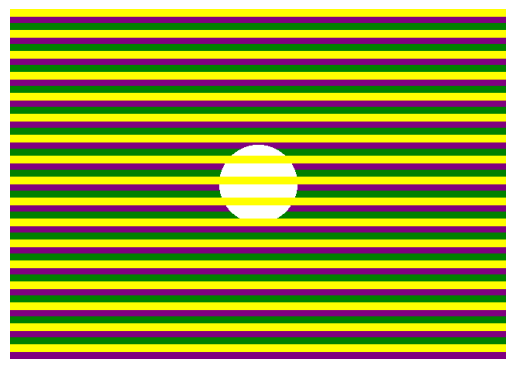

In [34]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

def draw_image():
    # Create a new image with a white background
    width, height = 640, 451
    image = Image.new("RGB", (width, height), "white")
    draw = ImageDraw.Draw(image)

    # Define colors for the stripes
    colors = ["yellow", "purple", "green"]
    stripe_height = height // 50  # Calculate the height of each stripe

    # Draw the horizontal stripes
    for i in range(50):
        color = colors[i % len(colors)]  # Alternate colors
        draw.rectangle([0, i * stripe_height, width, (i + 1) * stripe_height], fill=color)

    # Draw a white circle in the middle of the image
    circle_radius = 50
    center_x, center_y = width // 2, height // 2
    draw.ellipse([center_x - circle_radius, center_y - circle_radius,
                   center_x + circle_radius, center_y + circle_radius], fill="white")

    # Redraw the yellow stripes on top of the circle
    for i in range(50):
        if colors[i % len(colors)] == "yellow":
            draw.rectangle([0, i * stripe_height, width, (i + 1) * stripe_height], fill="yellow")

    return image

# Call the function and display the image
if __name__ == "__main__":
    img = draw_image()
    plt.imshow(img)
    plt.axis('off')  # Hide the axis
    plt.show()  # Display the image